### WHAT IS ATM ??

In [2]:
import torch
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmcv import Config
import scipy.io as sio
import os
import matplotlib.pyplot as plt
import matplotlib.image as pli
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import numpy as np
device

'cuda'

In [3]:
from eddy_seg_vit import load_model
from dataset_parser import EddyDatasetREGISTER

In [5]:
classes = EddyDatasetREGISTER.CLASSES
palette = EddyDatasetREGISTER.PALETTE
seg_Vit_L_cfg = "./configs/SegViT_L_EddyData.py"
cp = '/home/emir/dev/segmentation_eddies/output_segvit/iter_48000.pth'
model = load_model(config=seg_Vit_L_cfg, checkpoint=cp, device=device, CLASSES=classes, PALETTE=palette)
print(model.decode_head.class_embed)
model.decode_head.class_embed.out_features = 2
print(model.decode_head.class_embed.out_features)
model

load checkpoint from local path: /home/emir/dev/segmentation_eddies/output_segvit/iter_48000.pth
Linear(in_features=512, out_features=151, bias=True)
2


EncoderDecoder(
  (backbone): VisionTransformer(
    (patch_embed): PatchEmbed(
      (adap_padding): AdaptivePadding()
      (projection): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
    (drop_after_pos): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (ln1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attn): MultiheadAttention(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
          )
          (proj_drop): Dropout(p=0.0, inplace=False)
          (dropout_layer): Dropout(p=0.0, inplace=False)
        )
        (ln2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (ffn): FFN(
          (activate): GELU(approximate='none')
          (layers): Sequential(
            (0): Sequential(
              (0): Linear(in_features=1024, out_features=4096, bias=True)
              (1): GELU(approxima

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


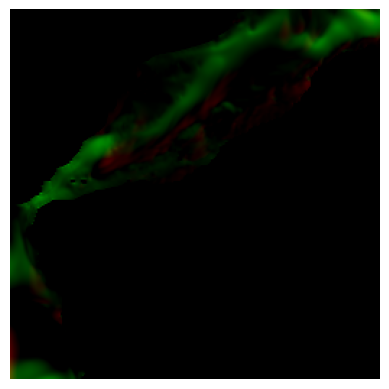

In [11]:
label = "/home/emir/dev/segmentation_eddies/downloads/data4test/valid_annot/7_2_201_51.png"
mat = "/home/emir/dev/segmentation_eddies/downloads/data4test/valid_data_mat/7_2_201_51.mat"
img_mat = sio.loadmat(mat)
img_x = img_mat['vxSample']
img_y = img_mat['vySample']
img = np.stack((img_x, img_y, np.zeros(img_x.shape)), -1)
img.shape
plt.imshow(img)
import matplotlib.image as mpimg
label = mpimg.imread(label)
plt.imshow(label)
plt.axis(False)
plt.imshow(img)